# Synthesis Project

In [3]:
import json
import os

current_directory = os.getcwd()
relative_path_to_scripts = 'scripts'
script_directory = os.path.join(current_directory, relative_path_to_scripts)
os.chdir(script_directory)

FileNotFoundError: [WinError 2] Impossibile trovare il file specificato: 'c:\\Users\\franc\\Documents\\GitHub\\Synthesis-Project\\scripts\\scripts'

### Here we create the chunked file

In [2]:
short_name = 'ATL03'
spatial_extent = [20, 60, 30, 68] # [lower left lon, lower left lat, upper right lon, upper right lat]
date_range = ['2018-11-26','2018-11-26']

with open("variables.json", "w") as jsonfile:
    json.dump({"short_name": short_name,"spatial_extent": spatial_extent ,"date_range": date_range }, jsonfile)

In [3]:
%run DataSelection.py

Map(center=[64.0, 25.0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out…

In [4]:
%run SelectionAndDownloadData.py



Files in the folder download_data:
processed_ATL03_20181126114738_08990103_006_02.h5
processed_ATL08_20181126114738_08990103_006_02.h5


In [76]:
consecutive_data = 30

with open('variables.json', 'r') as json_file:
    variables = json.load(json_file)

variables['threshold'] = consecutive_data

with open('variables.json', 'w') as json_file:
    json.dump(variables, json_file)


### Chunking the file

Selected interval: 320 - 354
Max height: 82.23383
Min height: 55.10899
Delta Ground: 27.124844 m


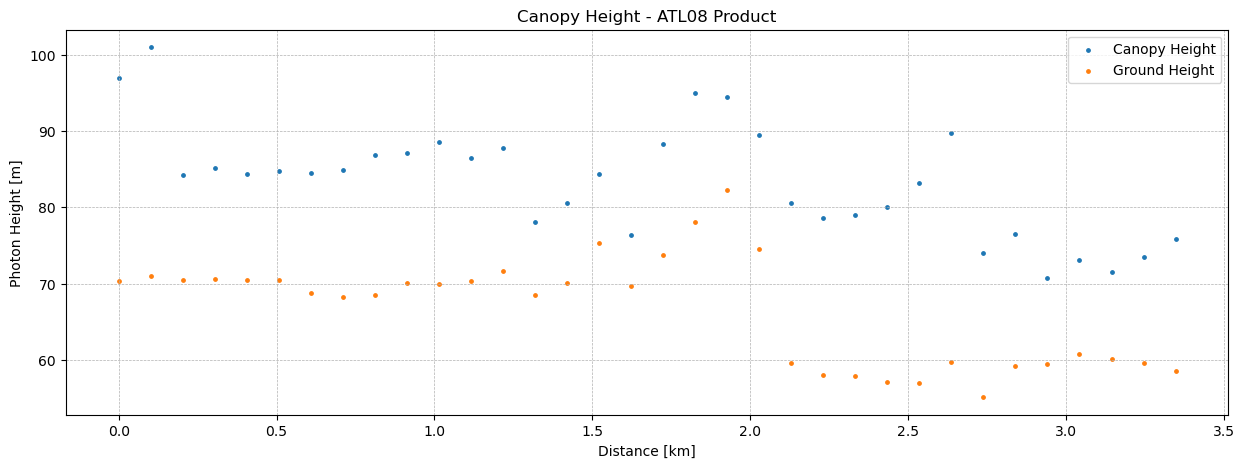

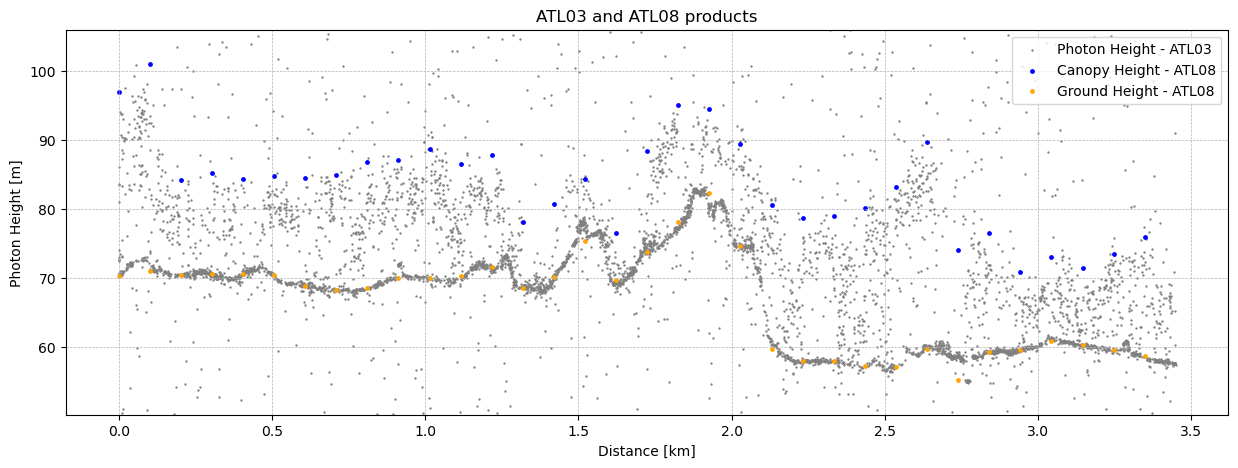

A file with the name chunked_canopy.hdf5 already exists in the folder.
Do you want to overwrite it? (y/n)
The file was overwritten.


In [77]:
%run CreateChunkedFile.py

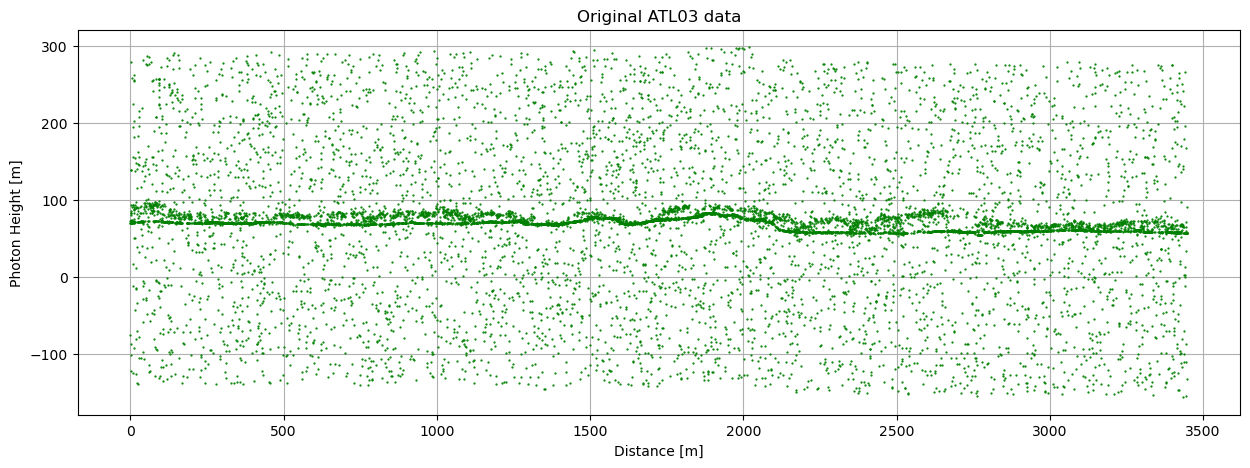

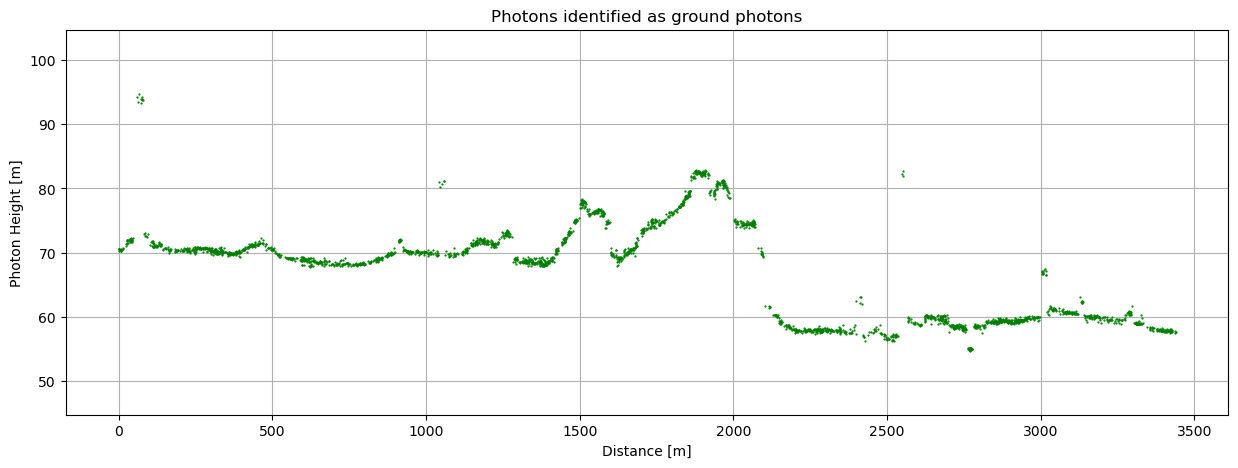

In [79]:
%run Binning.py

## Better output and Removing Outliers

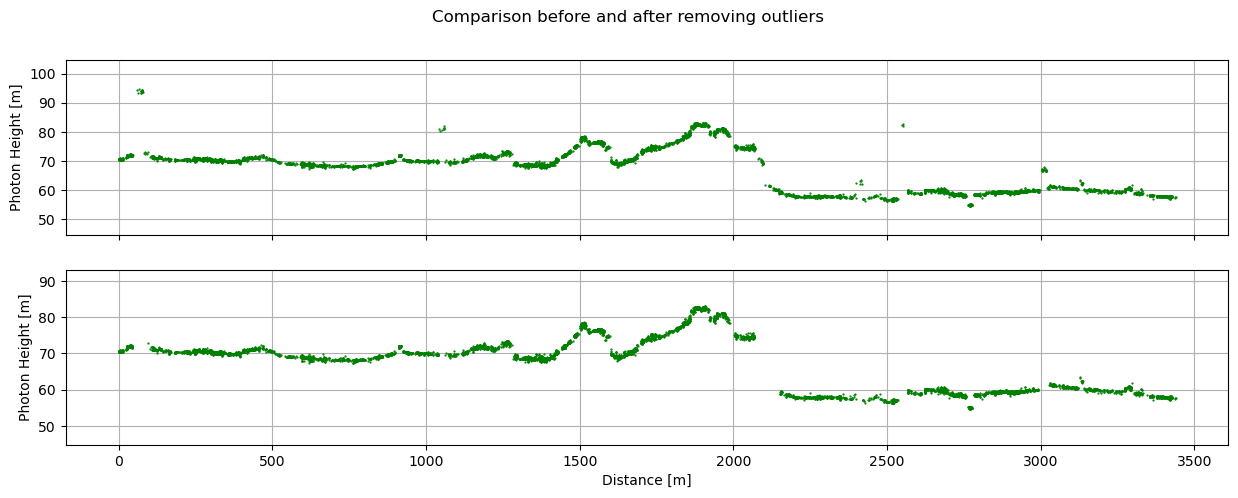

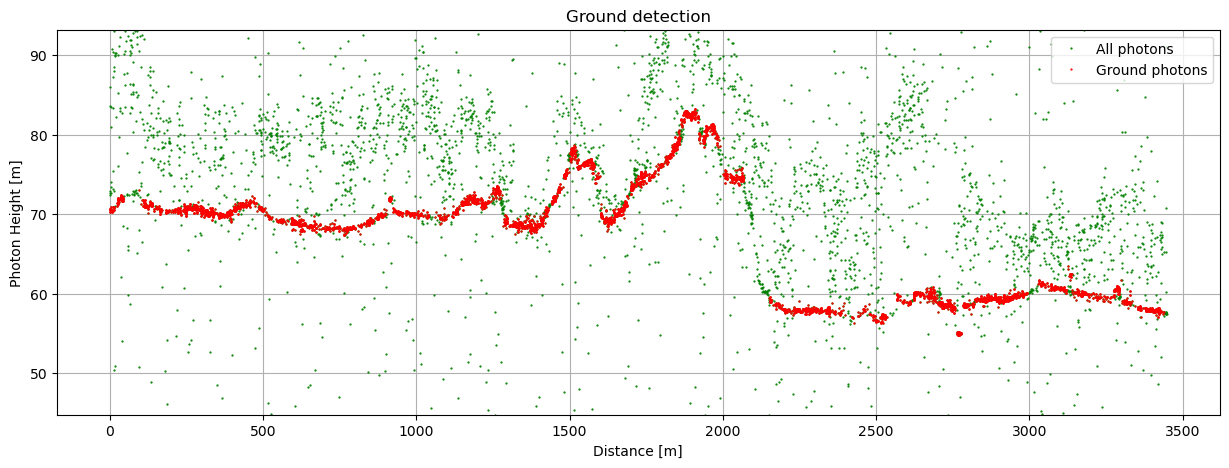

In [80]:
%run RemovingOutliers.py

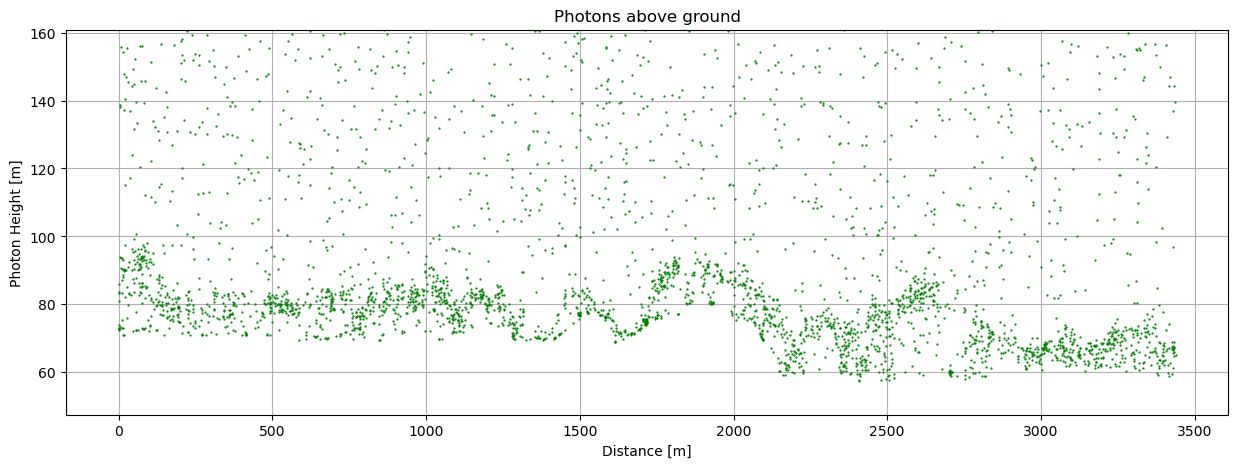

In [81]:
%run RemoveBelowPoints.py

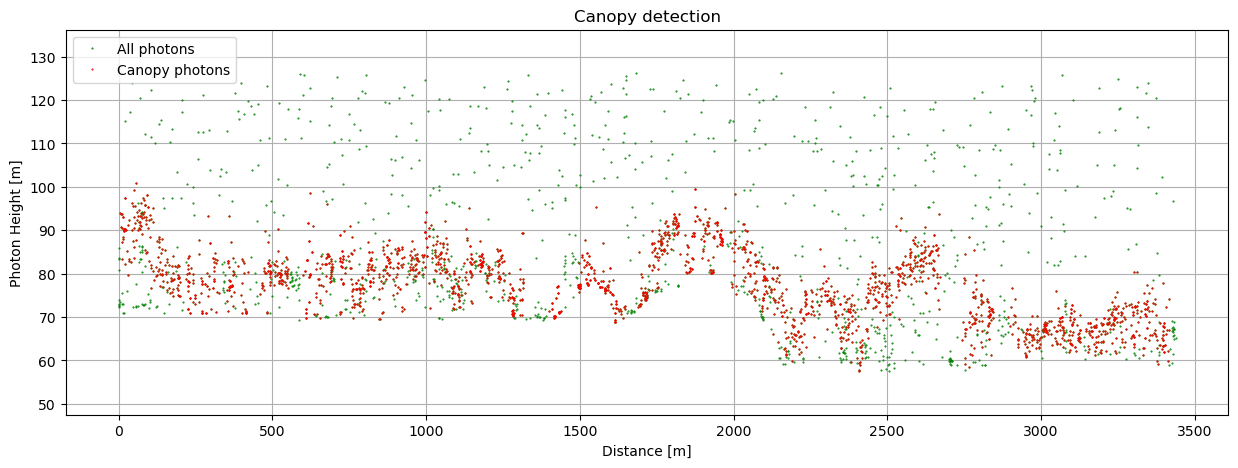

In [82]:
%run CanopyDetection.py

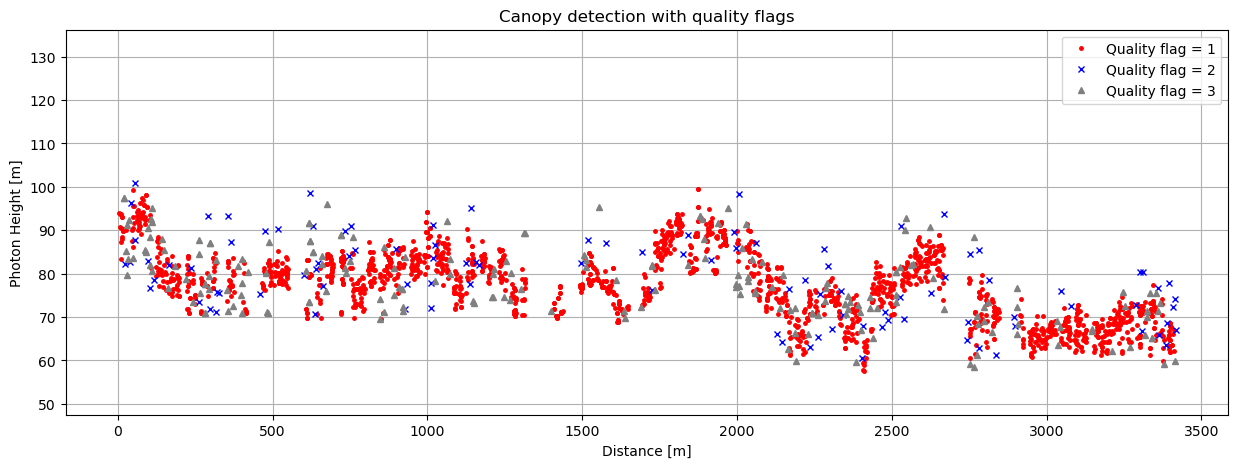

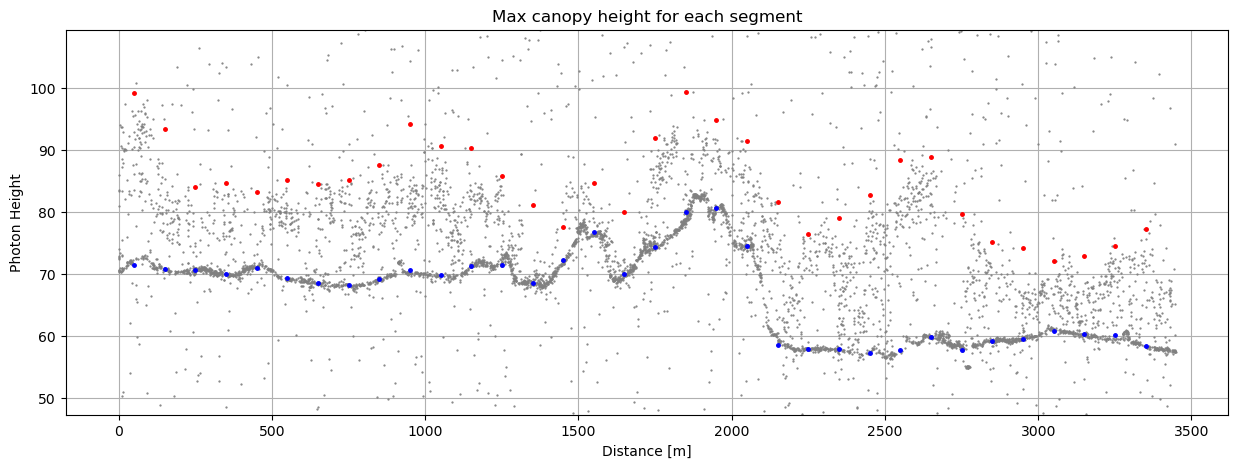

In [83]:
# Specify which quality flags to consider
user_quality_flags = [1, 0, 0]  # Only consider quality flag 1
segment = 100

with open('variables.json', 'r') as json_file:
    variables = json.load(json_file)

variables['user_quality_flags'] = user_quality_flags
variables['segment'] = segment

with open('variables.json', 'w') as json_file:
    json.dump(variables, json_file)


%run CanopyFlagging.py

## Comparison

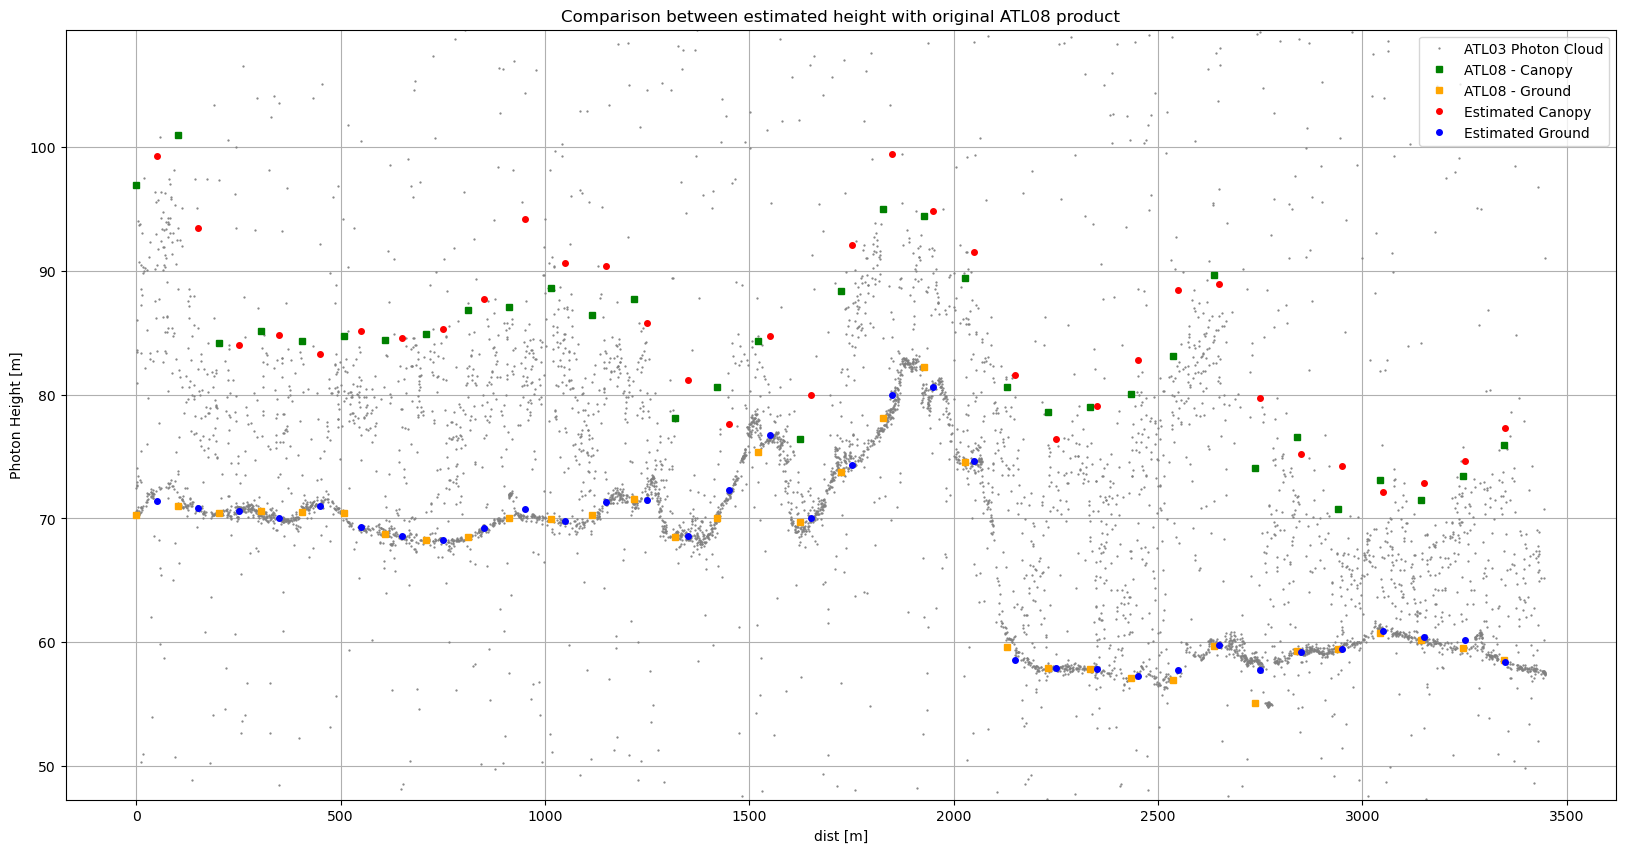

Mean of ATL08 ground_h:  66.61444 [m] ---- Mean of ground_mean:  66.9187499524165 [m]


Mean of ATL08 canopy_h:  16.774195 [m] ---- Mean of h_max:  17.581097010904948 [m]


In [84]:
%run ComparisonWithATL08.py